First few rows of the dataset:
   Unnamed: 0        X1        X2  y
0           0  0.118647 -0.181079  0
1           1  0.022316 -0.088976  0
2           2  0.181717  0.072110  0
3           3  0.256028 -0.042128  0
4           4  0.250036  0.012372  0


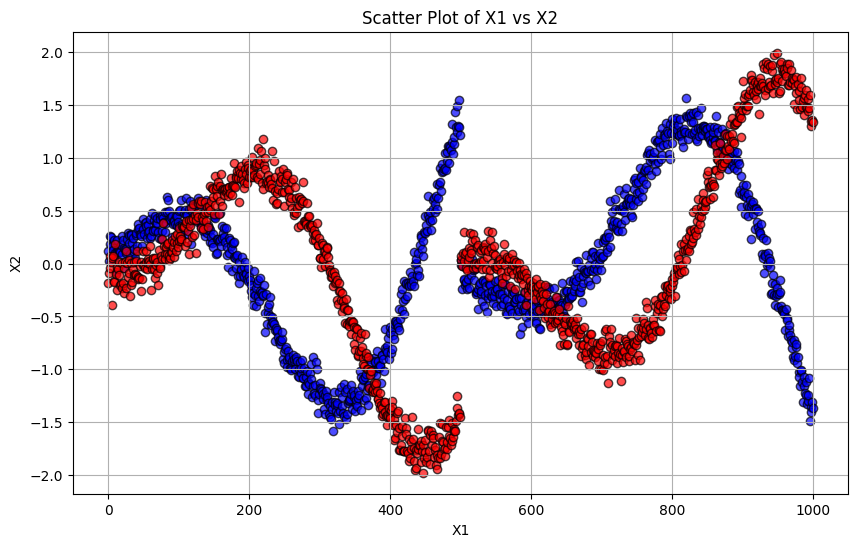

In [9]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the CSV File into a DataFrame
# Replace 'data.csv' with the path to your CSV file
filename = 'spiral.csv'
df = pd.read_csv(filename)

# Display the first few rows of the DataFrame to understand its structure
print("First few rows of the dataset:")
print(df.head())

# Step 3: Generate a Scatter Plot
# Replace 'Feature1' and 'Feature2' with the actual column names from your dataset
feature1 = 'X1'  # Replace with your actual feature name
feature2 = 'X2'  # Replace with your actual feature name

plt.figure(figsize=(10, 6))

# Create the scatter plot
# Scatter plot for Feature1
plt.scatter(df.index, df[feature1], c='blue', label=feature1, alpha=0.7, edgecolor='k')

# Scatter plot for Feature2
plt.scatter(df.index, df[feature2], c='red', label=feature2, alpha=0.7, edgecolor='k')


plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


NameError: name 'xx' is not defined

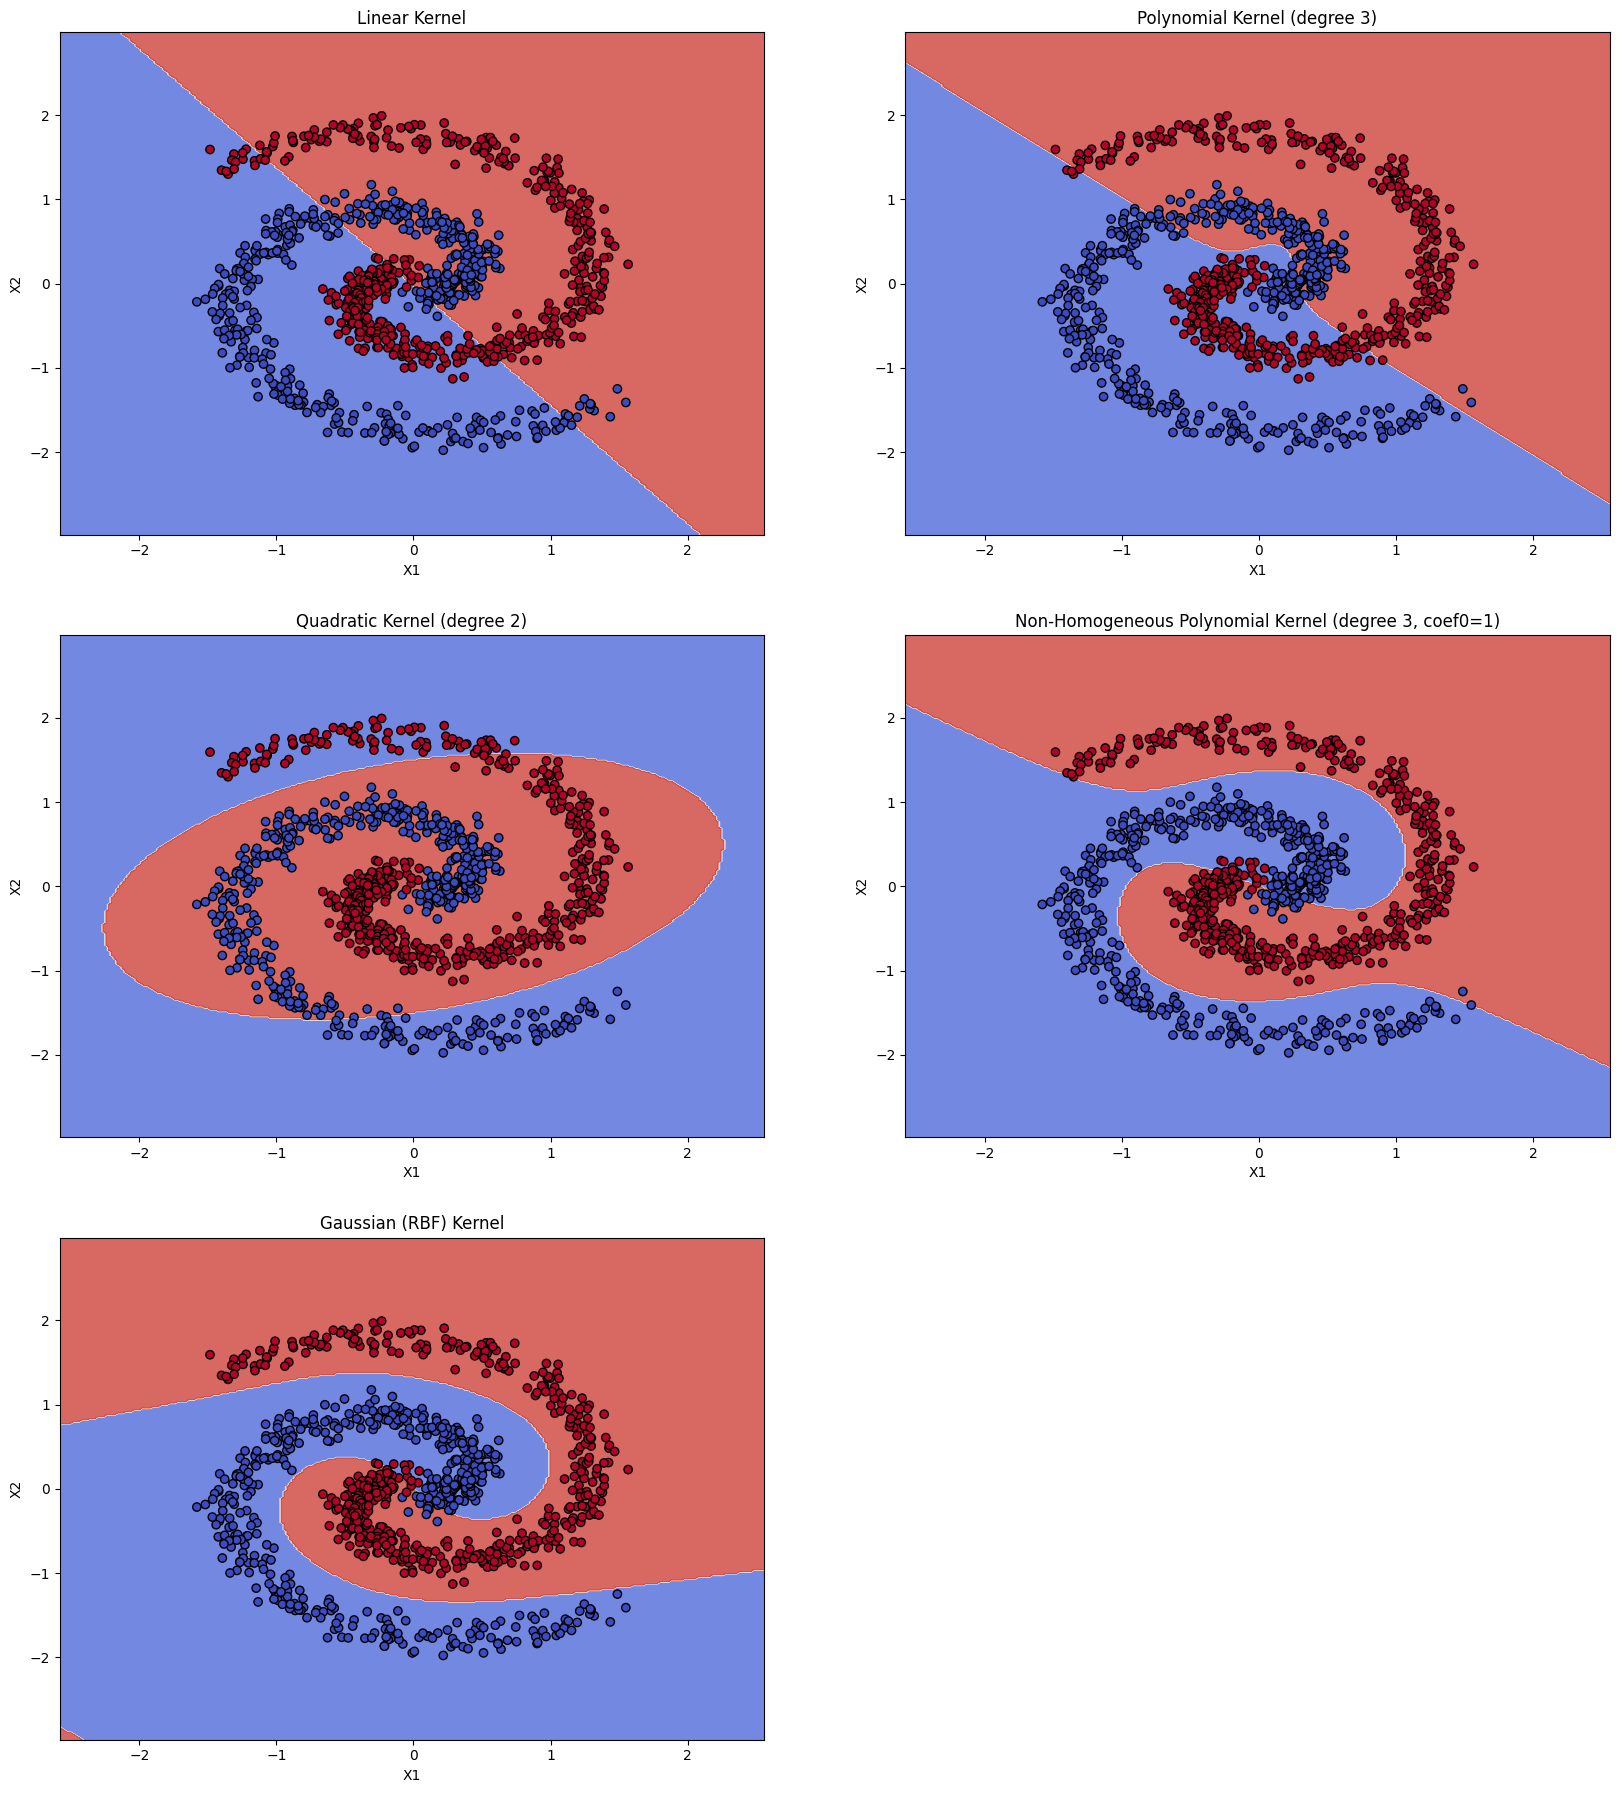

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Load the dataset
file_path = 'spiral.csv'  # Update this path
data = pd.read_csv(file_path)

# Drop the unnamed index column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Separate the features and labels
X = data_cleaned[['X1', 'X2']]
y = data_cleaned['y']

# Define a function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X['X1'].min() - 1, X['X1'].max() + 1
    y_min, y_max = X['X2'].min() - 1, X['X2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X['X1'], X['X2'], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)

# Kernel functions to test
kernels = [
    ('linear', 'Linear Kernel'),
    ('poly', 'Polynomial Kernel (degree 3)'),
    ('poly', 'Quadratic Kernel (degree 2)', 2),
    ('poly', 'Non-Homogeneous Polynomial Kernel (degree 3, coef0=1)', 3, 1),
    ('rbf', 'Gaussian (RBF) Kernel'),
    ('laplacian', 'Laplacian Kernel'),  # Laplacian kernel needs custom implementation
    ('sigmoid', 'Sigmoid Kernel')
]

plt.figure(figsize=(20, 30))

# Fit SVM for each kernel and plot decision boundaries
for i, kernel in enumerate(kernels, 1):
    if kernel[0] == 'laplacian':
        # Custom implementation for Laplacian kernel
        clf = SVC(kernel='precomputed')
        # Create Laplacian kernel matrix
        X_laplace = np.exp(-np.abs(X.values[:, np.newaxis] - X.values[np.newaxis, :]).sum(axis=2))
        clf.fit(X_laplace, y)
        Z = clf.predict(np.exp(-np.abs(np.c_[xx.ravel(), yy.ravel()][:, np.newaxis] - X.values[np.newaxis, :]).sum(axis=2)))
        Z = Z.reshape(xx.shape)
        plt.subplot(4, 2, i)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        plt.scatter(X['X1'], X['X2'], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title(kernel[1])
    else:
        clf = SVC(kernel=kernel[0], degree=kernel[2] if len(kernel) > 2 else 3, coef0=kernel[3] if len(kernel) > 3 else 0)
        clf.fit(X, y)
        plt.subplot(4, 2, i)
        plot_decision_boundary(clf, X, y, kernel[1])

plt.tight_layout()
plt.show()
